# Importing Libraries

In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [93]:
sns.set_palette('Set1')

In [94]:
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [95]:
data = pd.read_csv('heart.csv')

In [96]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Just a sanity check for null values. 

In [97]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Based on the data types attached to the columns, it seems like the data got read into the environment accurately. 

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Univariate Data Analysis
In this subsection, let us explore every attribute, within the data set, one by one. 
<br>
If the attribute into consideration possesses **continuous values**, then **distribution plots** provide a good summary of that attribute. If we have a **categorical quality**, then a **count plot** offers an excellent overview of that attribute. 
<br>
Later in bivariate data analysis, we will compare the attributes with the target attribute. 


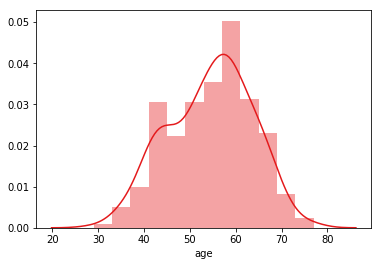

In [99]:
sns.distplot(data['age']);

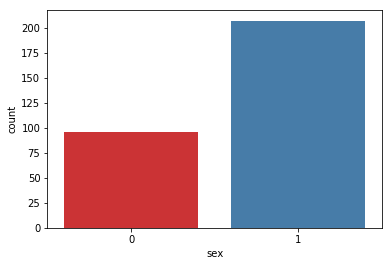

In [100]:
# 1 = male; 0 = female
sns.countplot(data['sex']);

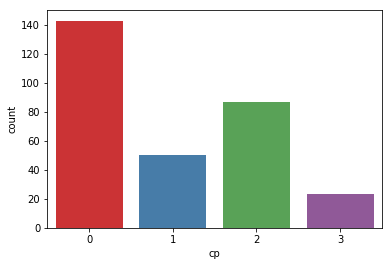

In [101]:
sns.countplot(data['cp']);

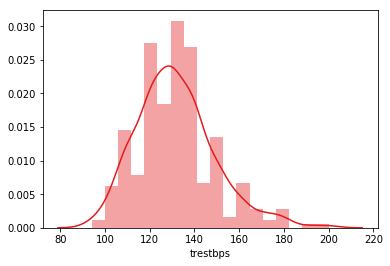

In [102]:
sns.distplot(data['trestbps'])

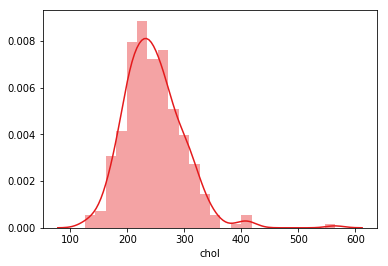

In [103]:
sns.distplot(data['chol'])

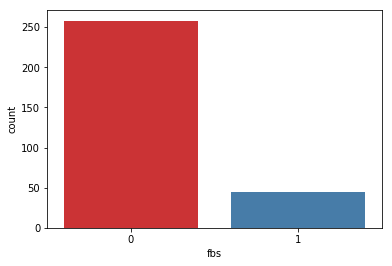

In [104]:
sns.countplot(data['fbs']);

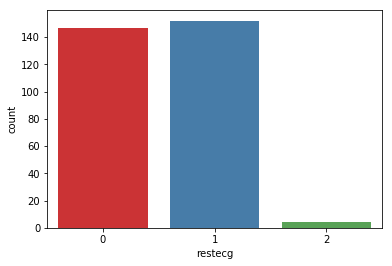

In [105]:
sns.countplot(data['restecg']);

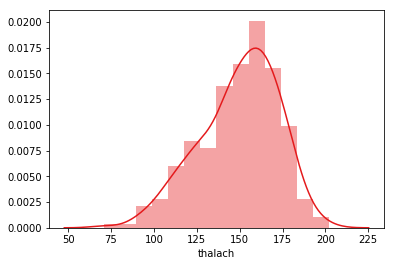

In [106]:
sns.distplot(data['thalach'])

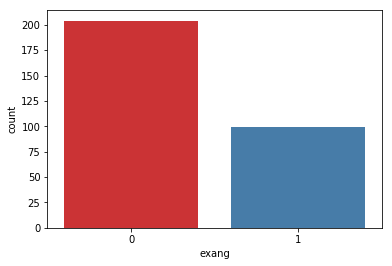

In [107]:
sns.countplot(data['exang']);

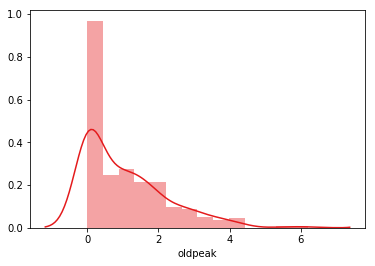

In [108]:
sns.distplot(data['oldpeak']);

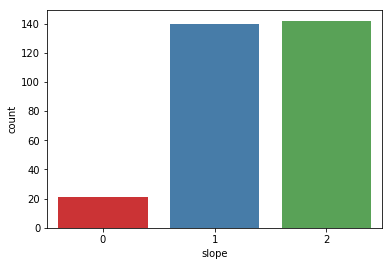

In [109]:
sns.countplot(data['slope']);

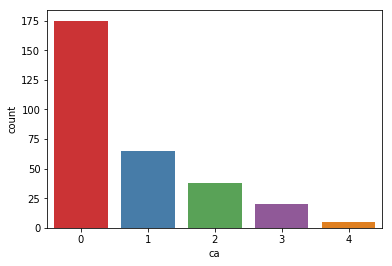

In [110]:
sns.countplot(data['ca']);

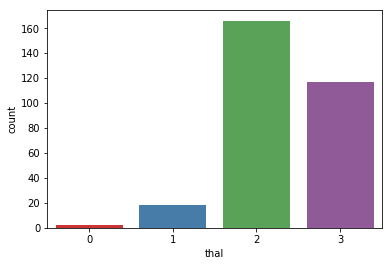

In [111]:
sns.countplot(data['thal']);

# Bivariate Data Analysis
In this subsection, let's go through the relationship shared by the target variable and the attributes. 

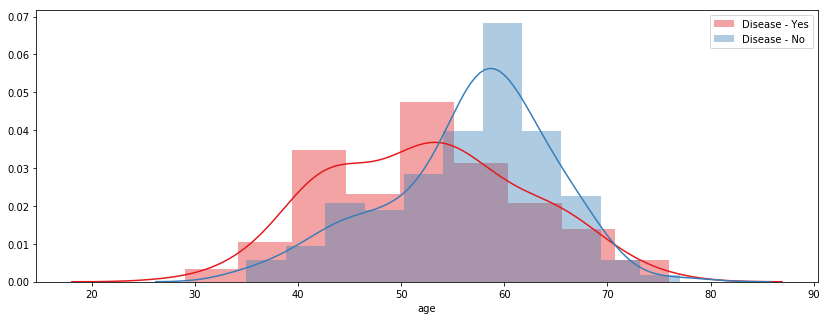

In [112]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['age'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['age'], label= "Disease - No")
plt.legend();

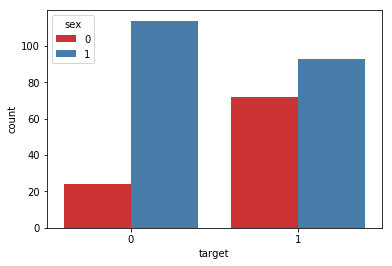

In [113]:
# 1 = male; 0 = female
sns.countplot(data['target'], hue = data['sex']);

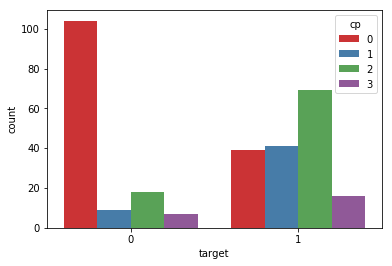

In [114]:
sns.countplot(data['target'], hue = data['cp']);

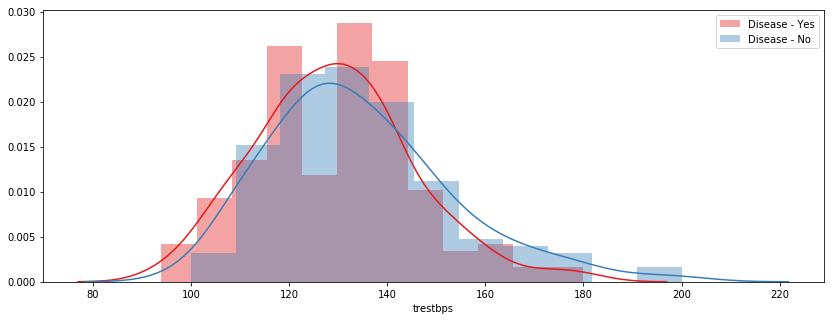

In [115]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['trestbps'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['trestbps'], label= "Disease - No")
plt.legend();

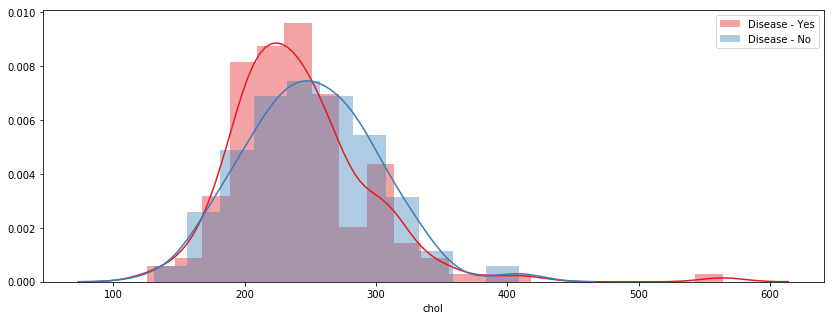

In [116]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['chol'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['chol'], label= "Disease - No")
plt.legend();

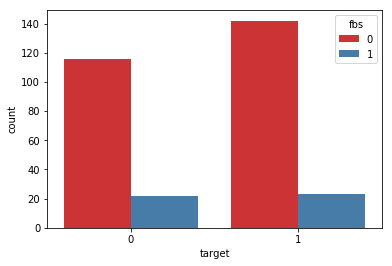

In [117]:
sns.countplot(data['target'], hue = data['fbs']);

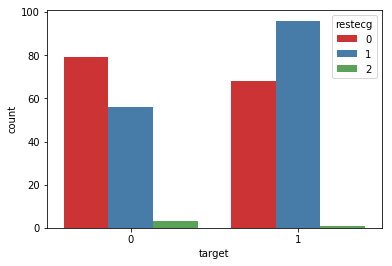

In [118]:
sns.countplot(data['target'] ,hue = data['restecg']);

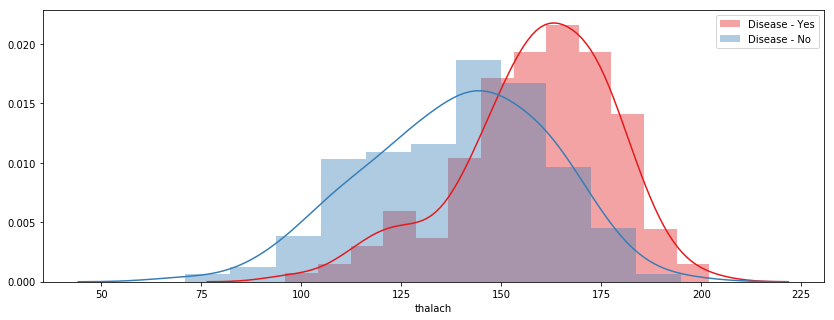

In [119]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['thalach'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['thalach'], label= "Disease - No")
plt.legend();

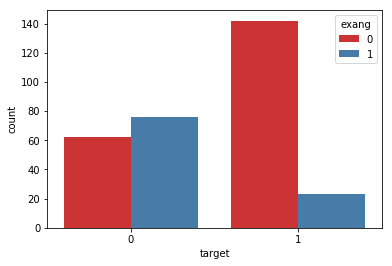

In [120]:
sns.countplot(data['target'], hue = data['exang']);

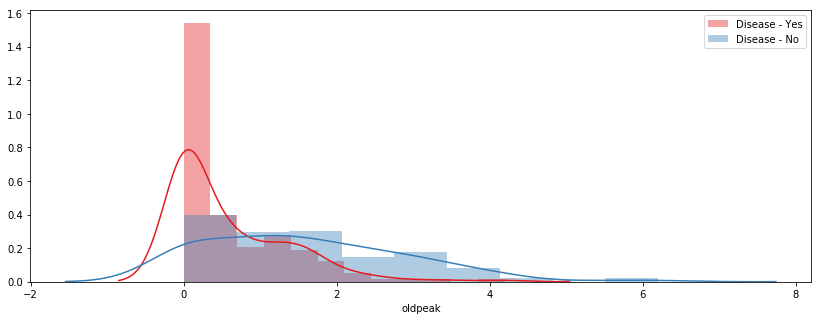

In [121]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['oldpeak'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['oldpeak'], label= "Disease - No")
plt.legend();

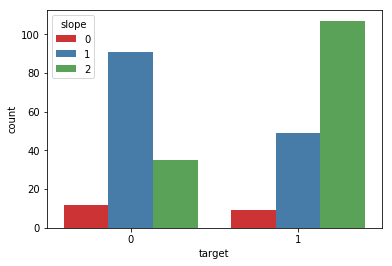

In [122]:
sns.countplot(data['target'], hue = data['slope']);

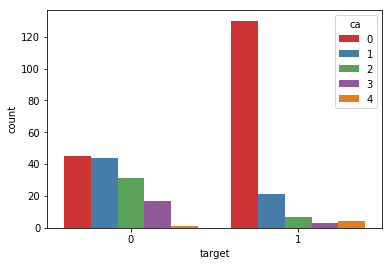

In [123]:
sns.countplot(data['target'], hue = data['ca']);

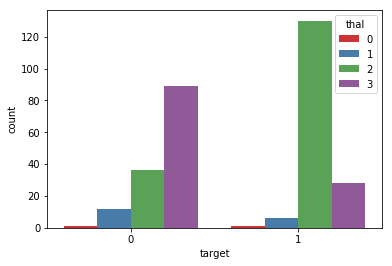

In [124]:
sns.countplot(data['target'], hue = data['thal']);

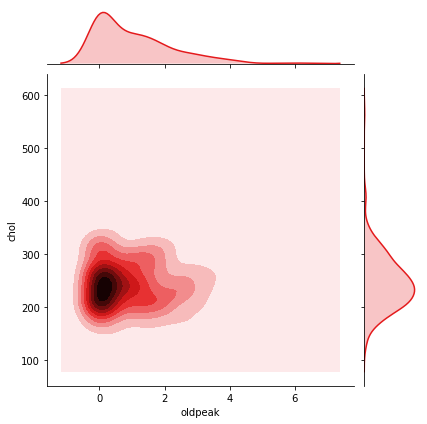

In [125]:
sns.jointplot(x= 'oldpeak' , y= 'chol' ,data= data, kind= 'kde');

# Trivariate Data Analysis
The focus of this subsection would be to gather information between two categorical and one continuous attributes.

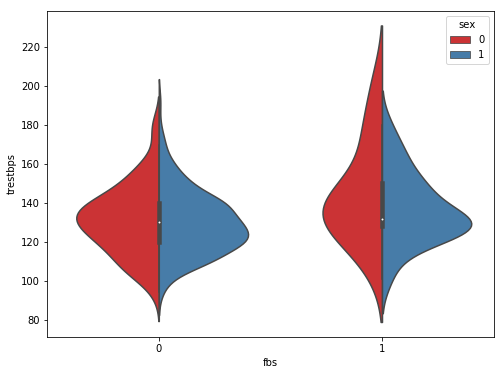

In [126]:
plt.figure(figsize=(8,6))
sns.violinplot(x = 'fbs',y= 'trestbps', data = data, hue = 'sex', split=True);

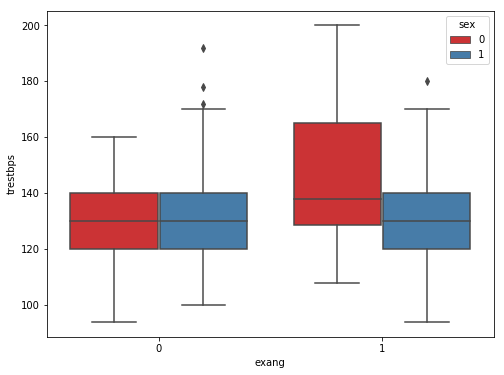

In [127]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'exang',y= 'trestbps', data = data, hue = 'sex');

# Correlation Matrix

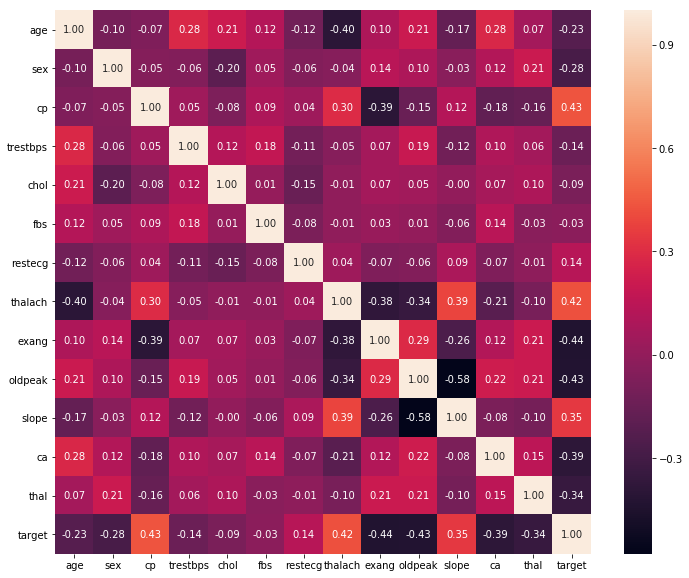

In [128]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot= True, fmt='.2f')
plt.show();

# Pairplot

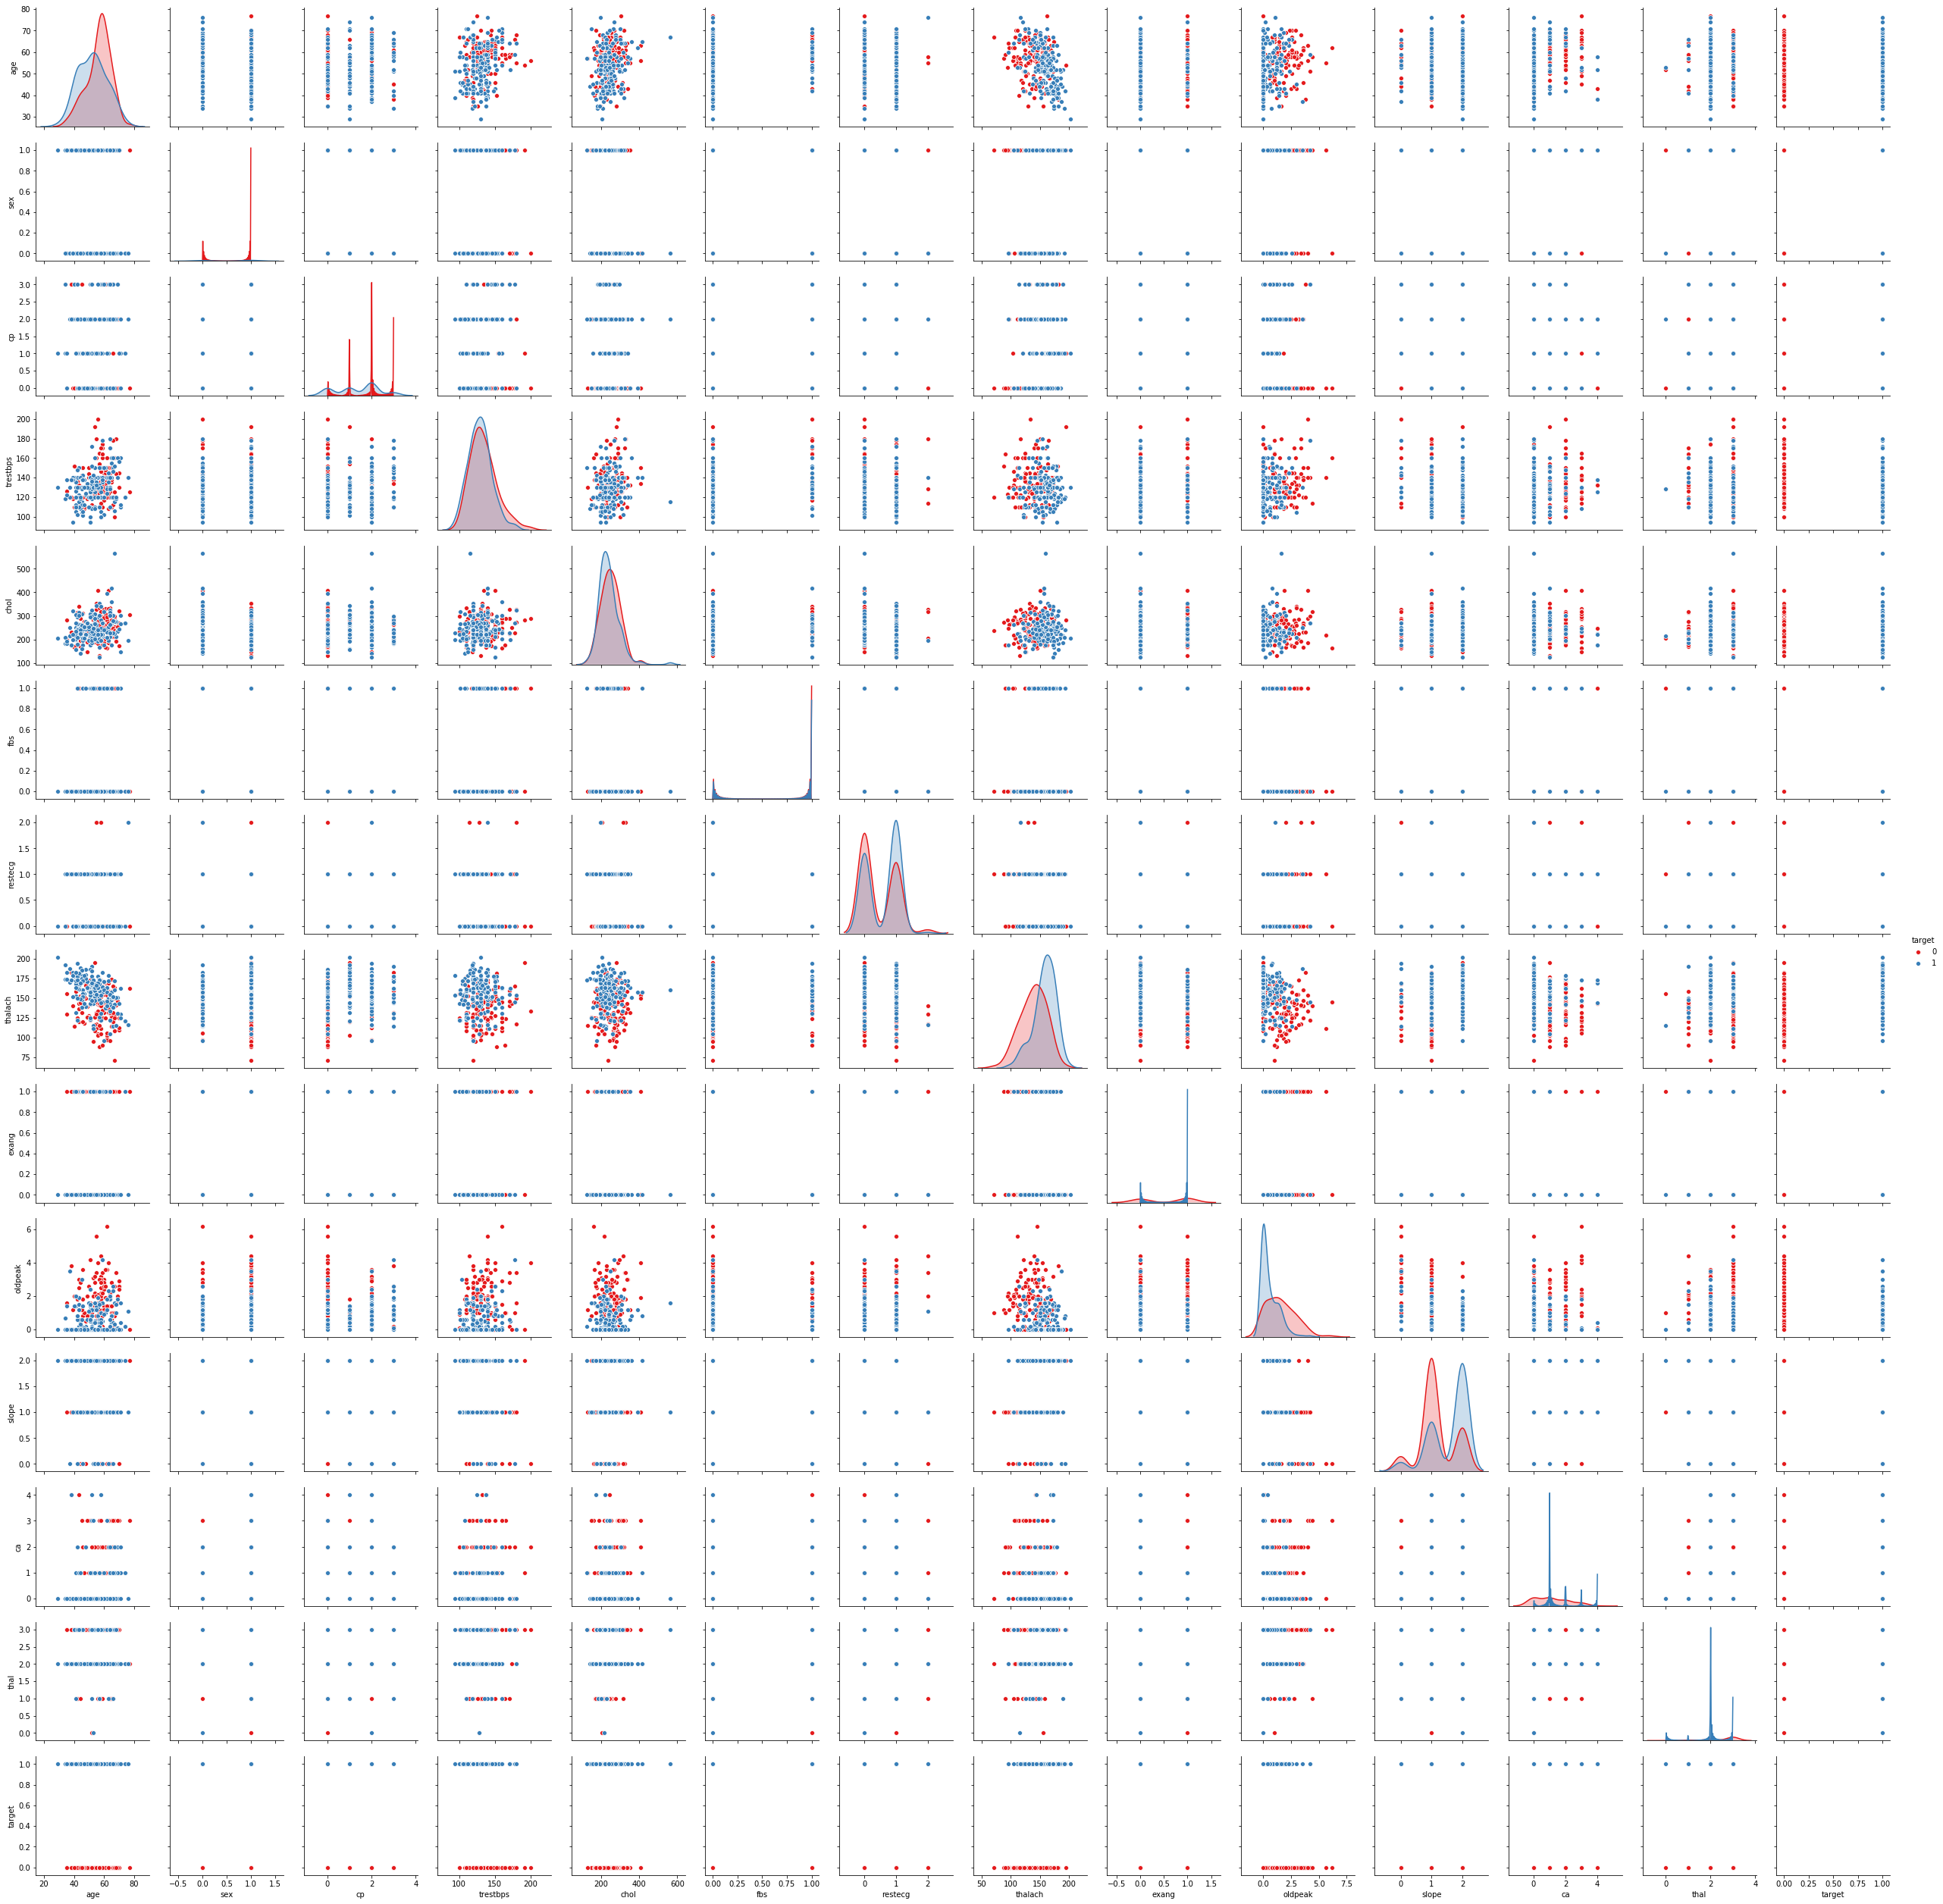

In [129]:
sns.pairplot(data, hue = 'target');

# Data Preprocessing
In this subsection, we need to preprocess categorical attributes with the help of ```get_dummies``` from **Pandas**. <br> 
If we skip this step, then the machine learning model will assume the numbers assigned to the attributes as a ranked variable, which it is not. 


In [130]:
sex = pd.get_dummies(data['sex'])
cp = pd.get_dummies(data['cp'])
fbs = pd.get_dummies(data['fbs'])
restecg = pd.get_dummies(data['restecg'])
exang = pd.get_dummies(data['exang'])
slope = pd.get_dummies(data['slope'])
ca = pd.get_dummies(data['ca'])
thal = pd.get_dummies(data['thal'])

In [131]:
data = pd.concat([data, sex, cp, fbs, restecg, exang, slope, ca, thal], axis = 1)

In [132]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,2,0,1,2,3,4,0,1,2,3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1,0,0,0,0,0,0,1,0


In [133]:
data.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis = 1, inplace= True)

# Support Vector Machine (Without Scaler)

In [134]:
from sklearn.svm import SVC

In [135]:
model = SVC(probability=True)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X = data.drop('target', axis = 1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [138]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [139]:
y_pred = model.predict(X_test)

In [140]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

In [141]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.60      0.07      0.13        42
          1       0.59      0.97      0.73        58

avg / total       0.59      0.59      0.48       100



# Support Vector Machine (With Scaler)
Significant performance improvements with ```MinMaxScaler```. 
The evaluation metric for this kernel will be **F1**, as it is the harmonic mean of precision and recall. <br>
But the evaluation metric will switch from precision to recall and vice-versa, depending on the problem statement of the project. 


In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()

In [144]:
X_train = scaler.fit_transform(X_train)

In [145]:
X_test = scaler.transform(X_test)

In [146]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [147]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.88      0.83        42
          1       0.91      0.83      0.86        58

avg / total       0.86      0.85      0.85       100



# Receiver Operating Characteristic (ROC) 1

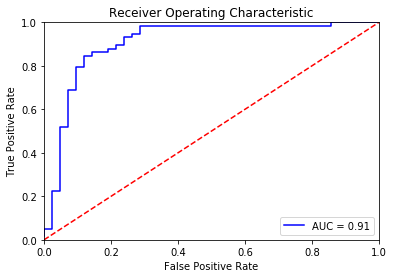

In [148]:
y_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Learning Curves
We have achieved a commendable model above, but let us take this project one step further.<br> 
Learning curves helps to detect if the model is affected by **bias or variance**.<br> 
Let us plot learning curves based on a different set of hyperparameters. <br>


In [149]:
from sklearn.model_selection import learning_curve

In [150]:
train_sizes, train_scores, test_scores = learning_curve(SVC(), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)

In [151]:
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)

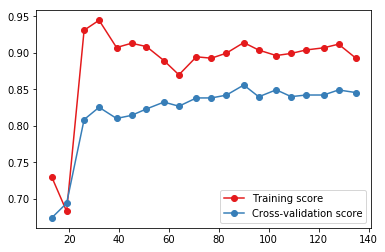

In [152]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

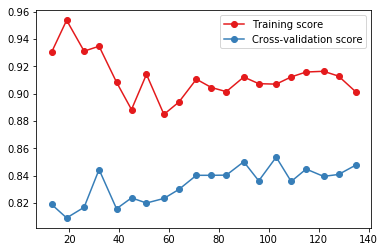

In [153]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=2), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

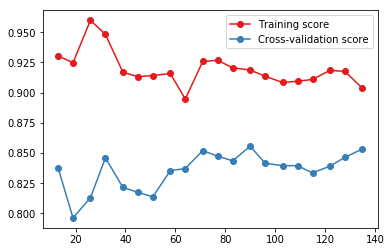

In [154]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=3), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

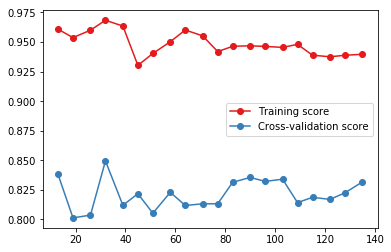

In [155]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=3, gamma=0.1), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

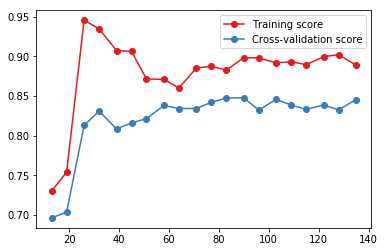

In [156]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=3, gamma=0.01), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

Now we can try every combination of hyperparameters and pick the best one. <br>
Fortunately, ```scikit-learn``` comes with a ```GridSearchCV``` function to help us quickly come up with the best possible set of hyperparameters for the desired evaluation metric. 


# GridSearchCV

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
param_grid = {'C':[1,2,3,4,5,6,7,8,14], 'gamma':[0.1, 0.01, 0.001, 0.0001], 'kernel':['linear', 'poly', 'rbf'], 'degree': [1,2,3,4,5]}
grid = GridSearchCV(param_grid= param_grid, estimator= SVC(), scoring='f1', refit= True, verbose=1)

In [159]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:    7.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 14], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [160]:
grid.best_params_

{'C': 7, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Narrowing down further

In [161]:
param_grid = {'C':[6,7,8], 'gamma':np.linspace(0.01, 0.02, 10), 'kernel':['rbf'], 'degree': [1,2,3,4,5]}
grid = GridSearchCV(param_grid= param_grid, estimator= SVC(probability= True), scoring='f1', refit= True, verbose=1)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.7s finished


{'C': 6, 'degree': 1, 'gamma': 0.011111111111111112, 'kernel': 'rbf'}

In [162]:
y_pred = grid.predict(X_test)

In [163]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.81      0.83        42
          1       0.87      0.90      0.88        58

avg / total       0.86      0.86      0.86       100



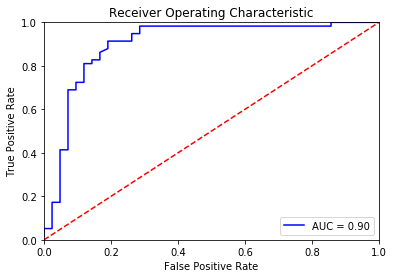

In [164]:
y_prob = grid.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [165]:
result = pd.DataFrame({'Test':y_test, 'Prediction':y_pred, 'Probability': y_prob[:,1]})

In [166]:
result.to_csv('Result.csv')